<a href="https://colab.research.google.com/github/sudheepelayidom/SNA/blob/main/social_influence_maximisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import requests
import networkx as nx

import pickle

!pip install nxviz
import nxviz as nv

import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp

from itertools import combinations
import random
from collections import Counter, defaultdict


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import time
!pip install ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.utils import multi_runs
# from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

# !pip install igraph
# from igraph import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.8 MB/s eta 0:00:00
no display found. Using non-interactive Agg backend


In [ ]:
# creating data directory function
def create_dir_save_file(dir_path: Path, url:str):
  # check if the path exists and create it if it does not
  # check if the file exists and create it if it does not

  if not dir_path.parents[0].exists():
    dir_path.parents[0].mkdir(parents=True)
    print(f'Directory Created: {dir_path.parents[0]}')
  else:
    print('Directory exists')

  if not dir_path.exists():
    r = requests.get(url,allow_redirects= True)
    open(dir_path, 'wb').write(r.content)
    print(f'File Created: {dir_path.name}')
  else:
    print('File Exists')

In [ ]:
data_dir=Path('/content/drive/MyDrive/Dataset_SNA')
images_dir=Path('/content/drive/MyDrive/Results_SNA')



In [ ]:
twitter = 'https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p'
github = 'https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p'

In [ ]:
# to build a network
datasets = [twitter, github]
data_paths = list()

for data in datasets:
  file_name = data.split('/')[-1].replace('?raw = true','')
  data_path = data_dir / file_name
  create_dir_save_file(data_path, data)
  data_paths.append(data_path)

Directory exists
File Created: ego-twitter.p
Directory exists
File Created: github_users.p


In [ ]:
# data
T = pd.read_pickle(data_paths[0])
Gh = pd.read_pickle(data_paths[1])

In [ ]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(type(list(T.edges(data= True))[-1][-2]))

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
<class 'int'>


In [ ]:
T.nodes(data=True)

NodeDataView({1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'ce

In [ ]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']
print(noi)

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]
print(eoi)

[3, 8, 10, 11, 12, 14, 18, 21, 25, 26, 28, 29, 34, 38, 39, 40, 41, 43, 47, 48, 50, 52, 53, 57, 60, 61, 65, 67, 76, 79, 81, 83, 84, 85, 87, 88, 90, 95, 97, 99, 101, 102, 108, 110, 111, 115, 116, 118, 120, 122, 123, 127, 129, 131, 136, 138, 141, 148, 156, 169, 170, 172, 174, 175, 176, 177, 178, 179, 180, 191, 192, 194, 197, 199, 202, 203, 204, 205, 213, 217, 223, 224, 226, 229, 231, 237, 242, 247, 249, 251, 255, 260, 271, 272, 273, 276, 277, 278, 282, 285, 287, 288, 289, 290, 293, 297, 298, 301, 305, 306, 310, 312, 314, 316, 317, 318, 322, 324, 328, 329, 330, 334, 340, 343, 346, 357, 358, 362, 365, 366, 369, 370, 371, 372, 379, 381, 383, 384, 385, 390, 394, 396, 397, 398, 401, 405, 408, 410, 411, 416, 417, 419, 420, 423, 427, 428, 430, 431, 437, 438, 441, 443, 445, 446, 447, 454, 455, 458, 459, 466, 471, 474, 478, 479, 484, 487, 489, 491, 493, 499, 504, 506, 507, 517, 521, 525, 526, 527, 529, 531, 538, 540, 541, 546, 552, 554, 564, 570, 575, 578, 591, 592, 593, 594, 595, 605, 607, 610, 6

In [ ]:
G3 = nx.DiGraph()
G3.add_nodes_from(noi[:50])
G3.add_edges_from(eoi[:50])

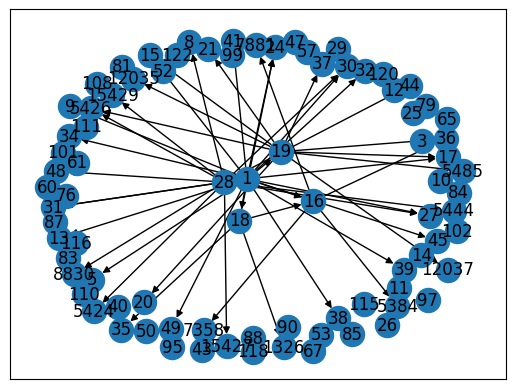

In [ ]:
%matplotlib inline
nx.draw_networkx(G3)
plt.show()

/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


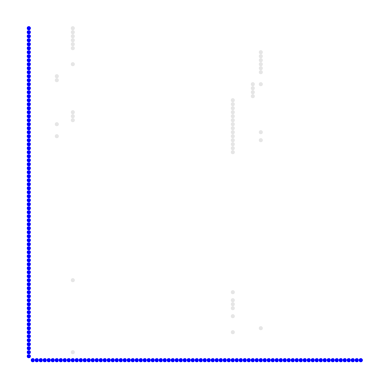

In [ ]:
nv.MatrixPlot(G3)

/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


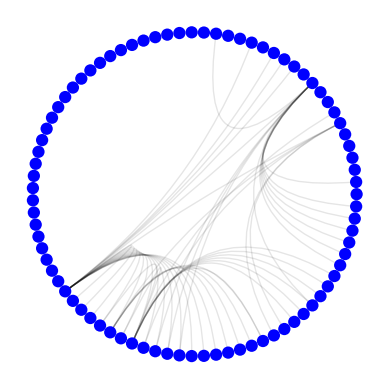

In [ ]:
nv.CircosPlot(G3)

/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


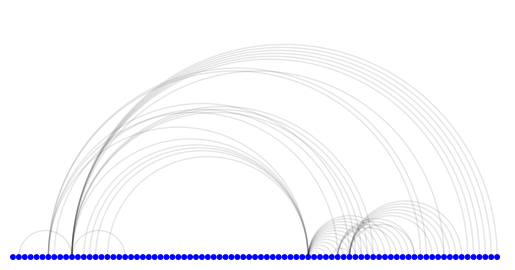

In [ ]:
nv.ArcPlot(G3)

In [ ]:
# degree Centrality
Dc = nx.degree_centrality(G3).values() # T_sub
Cc = nx.closeness_centrality(G3).values() # T_sub
Bc = nx.betweenness_centrality(G3).values() # T_sub

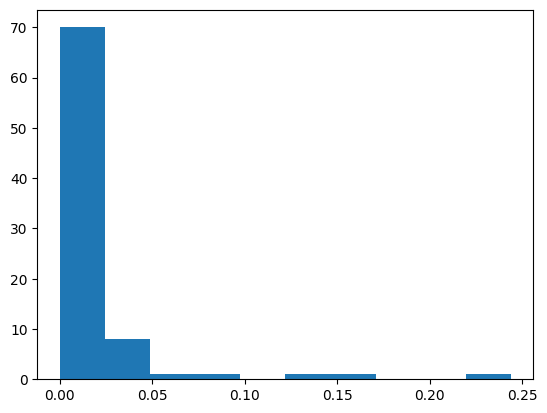

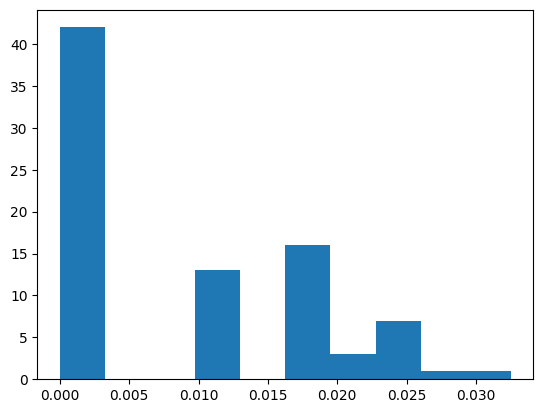

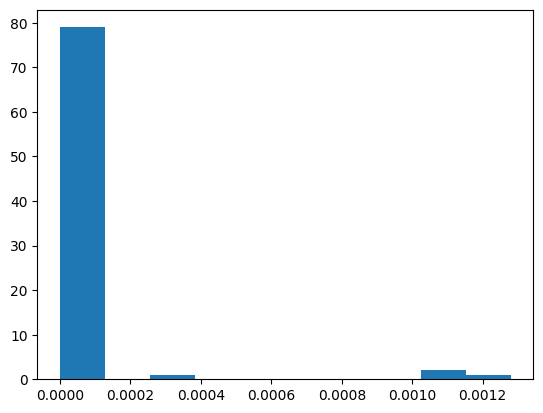

In [ ]:
# to plot degree distribution of the twitter data
plt.hist(list(Dc))
plt.show()
plt.hist(list(Cc))
plt.show()
plt.hist(list(Bc))
plt.show()

In [ ]:
# Other diffusion Models
# g = nx.erdos_renyi_graph(100, 0.4) #to use this graph to induce infection
model_si = ep.SIModel(G3) # T_sub

import json

print(json.dumps(model_si.parameters, indent=2))


{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": "[0,1]",
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [ ]:
model_si.available_statuses

import ndlib.models.ModelConfig as mc

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.2)
model_si.set_initial_status(cfg)

iterations = model_si.iteration_bunch(200, node_status=True)
print(iterations)

trends = model_si.build_trends(iterations)
print(trends)


[{'iteration': 0, 'status': {3: 0, 8: 0, 10: 0, 11: 0, 12: 0, 14: 0, 18: 0, 21: 1, 25: 0, 26: 0, 28: 0, 29: 0, 34: 0, 38: 0, 39: 0, 40: 0, 41: 0, 43: 1, 47: 0, 48: 1, 50: 0, 52: 0, 53: 0, 57: 0, 60: 0, 61: 0, 65: 0, 67: 0, 76: 0, 79: 1, 81: 0, 83: 1, 84: 0, 85: 0, 87: 0, 88: 0, 90: 0, 95: 0, 97: 0, 99: 1, 101: 0, 102: 0, 108: 0, 110: 1, 111: 1, 115: 0, 116: 0, 118: 0, 120: 0, 122: 0, 1: 0, 5: 0, 9: 0, 13: 0, 15: 1, 16: 1, 17: 0, 19: 0, 24: 0, 27: 0, 30: 0, 31: 0, 32: 0, 45: 0, 49: 0, 5384: 1, 7881: 0, 7358: 0, 36: 1, 35: 0, 1326: 0, 12035: 1, 20: 1, 5426: 0, 12037: 0, 37: 0, 5485: 0, 8830: 1, 15427: 0, 5424: 0, 5444: 0, 44: 0, 15429: 1}, 'node_count': {0: 67, 1: 16}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 1, 'status': {}, 'node_count': {0: 67, 1: 16}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 2, 'status': {7881: 1}, 'node_count': {0: 66, 1: 17}, 'status_delta': {0: -1, 1: 1}}, {'iteration': 3, 'status': {}, 'node_count': {0: 66, 1: 17}, 'status_delta': {0: 0, 1: 0}}, {'iterati

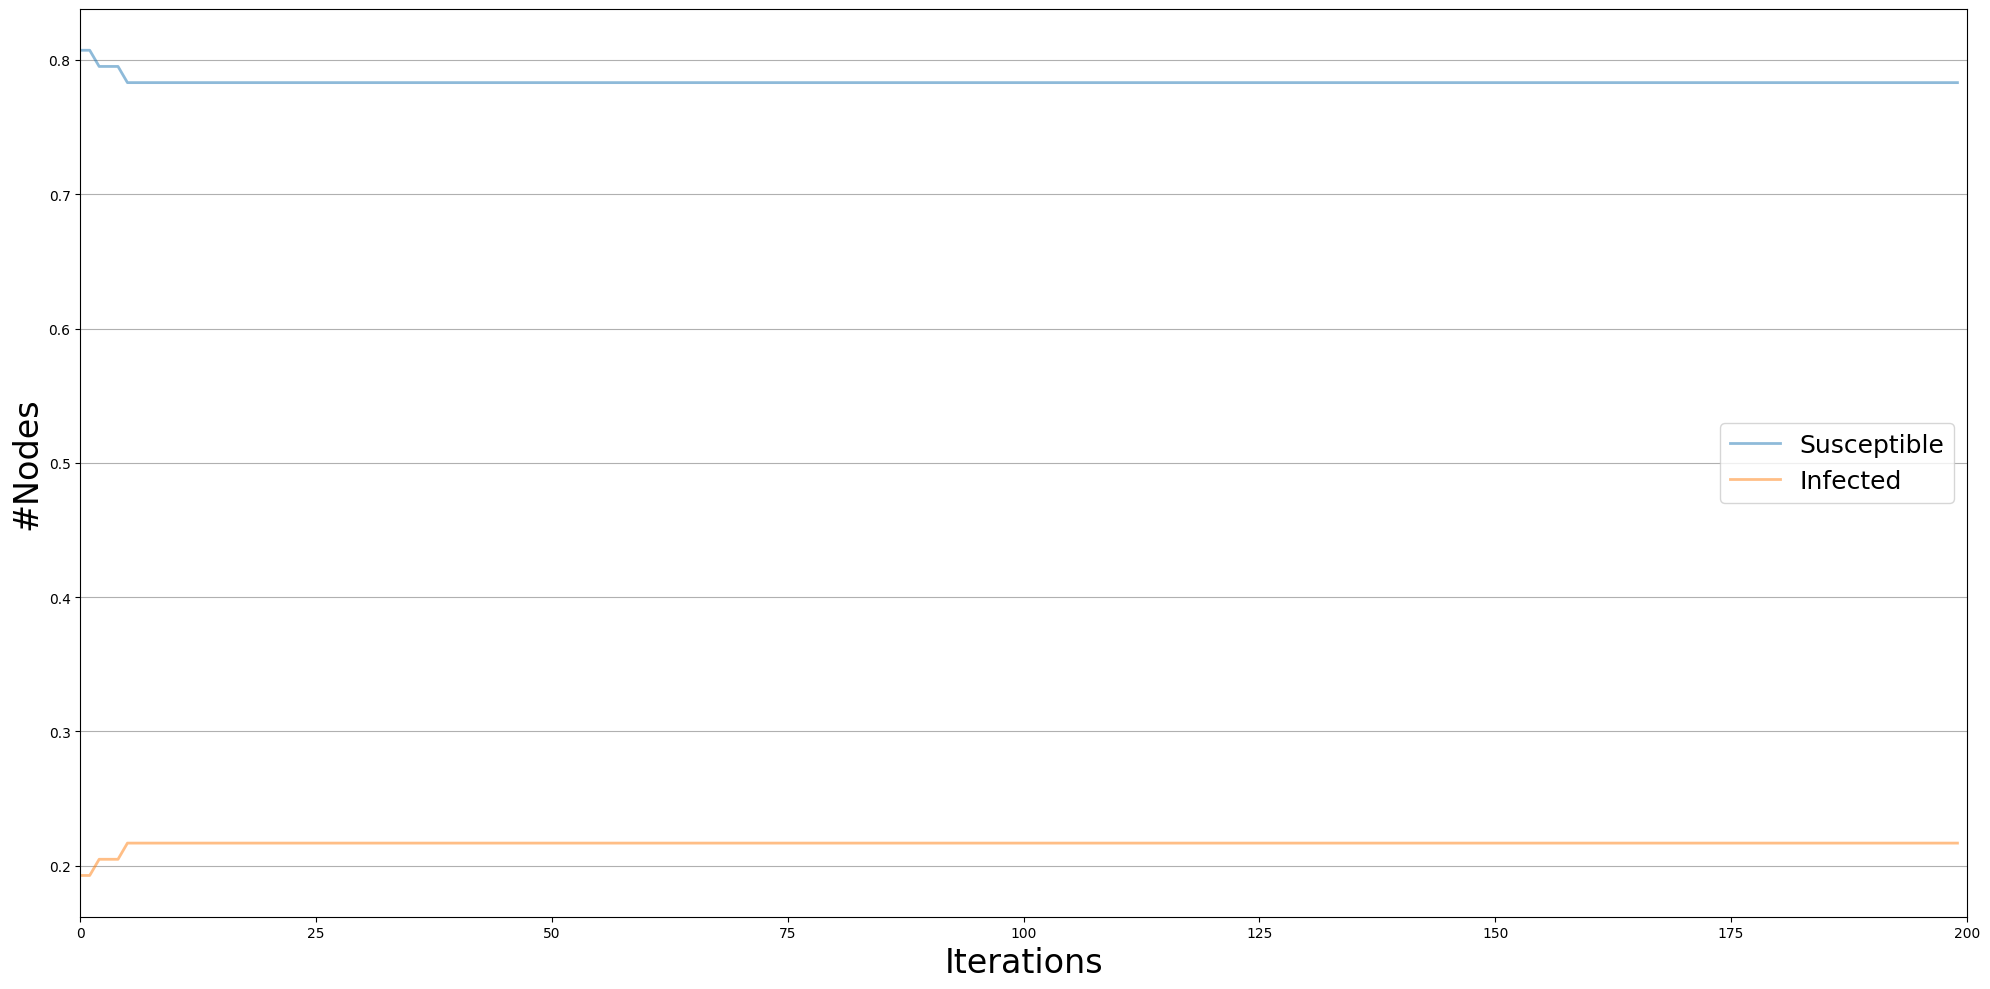

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_si, trends)
viz.plot()

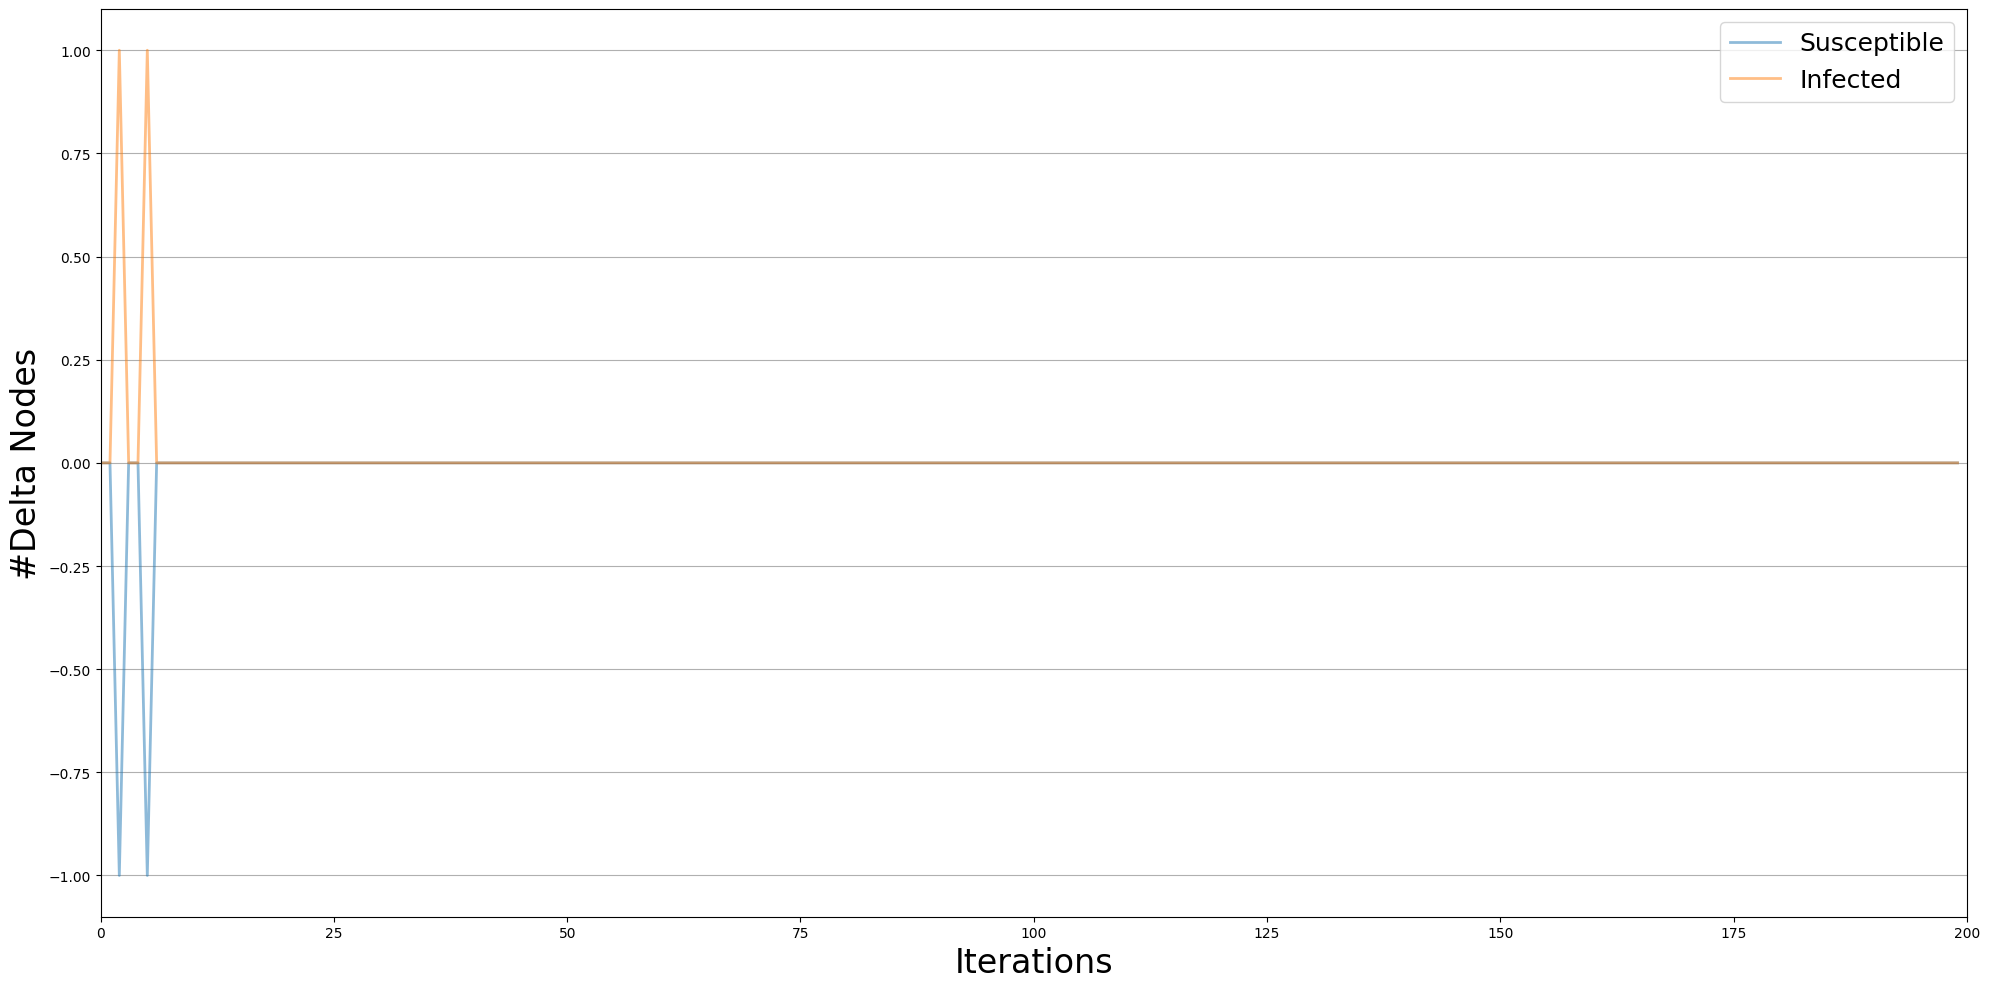

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model_si, trends)
viz.plot()

In [ ]:
# g = nx.erdos_renyi_graph(100, 0.4) #to use this graph to induce infection
model_sis = ep.SISModel(G3) # T_sub

print(json.dumps(model_sis.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "lambda": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [ ]:
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)
model_sis.set_initial_status(cfg)

# Simulation execution
iterations = model_sis.iteration_bunch(200)
print(iterations)

trends = model_sis.build_trends(iterations)
print(trends)

[{'iteration': 0, 'status': {3: 1, 8: 0, 10: 0, 11: 0, 12: 0, 14: 0, 18: 0, 21: 0, 25: 0, 26: 0, 28: 0, 29: 0, 34: 0, 38: 0, 39: 0, 40: 0, 41: 0, 43: 0, 47: 0, 48: 0, 50: 0, 52: 0, 53: 0, 57: 0, 60: 0, 61: 0, 65: 1, 67: 0, 76: 0, 79: 0, 81: 0, 83: 0, 84: 0, 85: 1, 87: 0, 88: 0, 90: 0, 95: 0, 97: 0, 99: 0, 101: 0, 102: 0, 108: 0, 110: 0, 111: 0, 115: 0, 116: 0, 118: 0, 120: 0, 122: 0, 1: 0, 5: 0, 9: 0, 13: 0, 15: 0, 16: 0, 17: 0, 19: 0, 24: 0, 27: 0, 30: 0, 31: 0, 32: 0, 45: 0, 49: 0, 5384: 0, 7881: 0, 7358: 0, 36: 0, 35: 0, 1326: 0, 12035: 0, 20: 1, 5426: 0, 12037: 0, 37: 0, 5485: 0, 8830: 0, 15427: 0, 5424: 0, 5444: 0, 44: 0, 15429: 0}, 'node_count': {0: 79, 1: 4}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 1, 'status': {}, 'node_count': {0: 79, 1: 4}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 2, 'status': {}, 'node_count': {0: 79, 1: 4}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 3, 'status': {}, 'node_count': {0: 79, 1: 4}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 4, 'sta

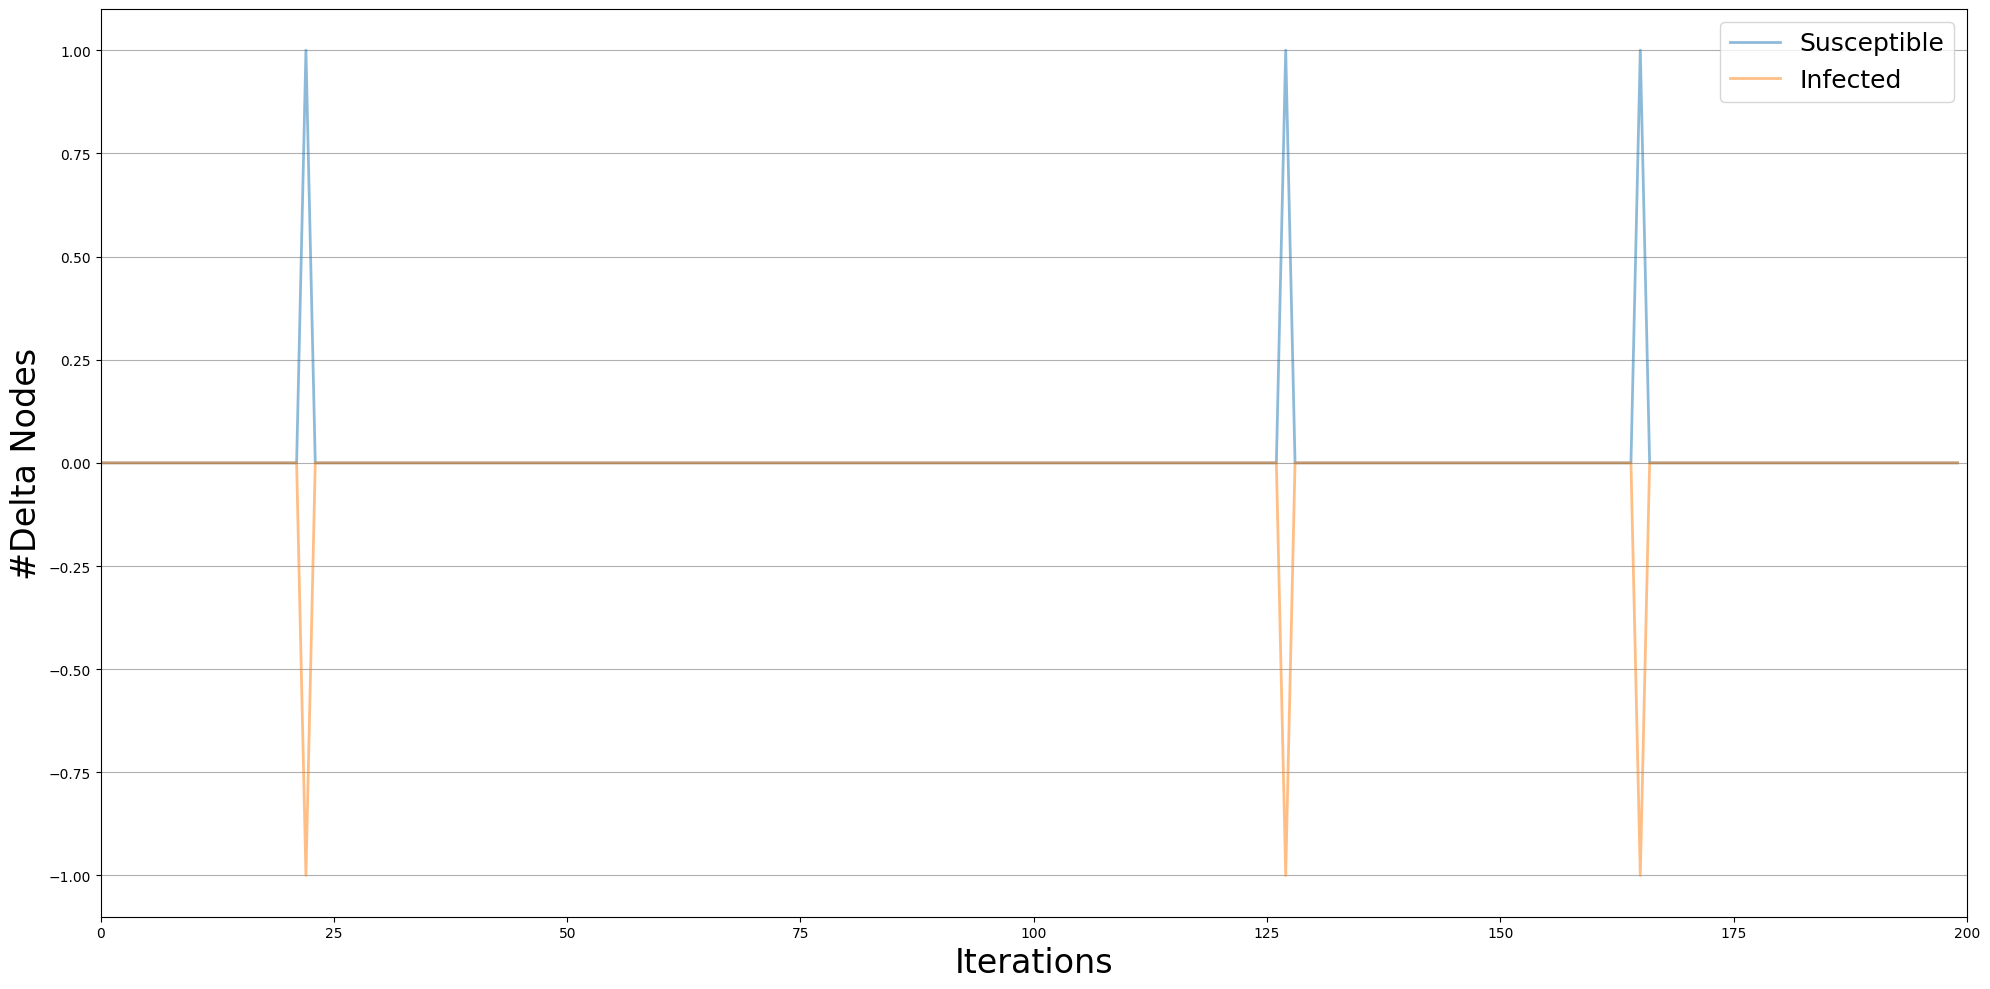

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model_sis, trends)
viz.plot()

In [ ]:
# g = nx.erdos_renyi_graph(100, 0.4) #to use this graph to induce infection
model_sir = ep.SIRModel(G3) # T_sub

import json
print(json.dumps(model_sir.parameters, indent=2))
model_sir.available_statuses

import ndlib.models.ModelConfig as mc

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate

cfg.add_model_parameter("percentage_infected", 0.01)
model_sir.set_initial_status(cfg)

iterations = model_sir.iteration_bunch(200, node_status=True)
print(iterations)

trends = model_sir.build_trends(iterations)
print(trends)


{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}
[{'iteration': 0, 'status': {3: 0, 8: 0, 10: 0, 11: 0, 12: 0, 14: 0, 18: 0, 21: 0, 25: 0, 26: 0, 28: 0, 29: 0, 34: 0, 38: 0, 39: 0, 40: 0, 41: 0, 43: 0, 47: 0, 48: 0, 50: 0, 52: 0, 53: 0, 57: 0, 60: 0, 61: 0, 65: 0, 67: 0, 76: 0, 79: 0, 81: 0, 83: 0, 84: 0, 85: 0, 87: 0, 88: 0, 90: 0, 95: 0, 97: 0, 99: 0, 101: 0, 102: 0, 108: 0, 110: 0, 111: 0, 115: 0, 116: 0, 118: 0, 120: 0, 122: 0, 1: 0, 5: 0, 9: 1, 13: 0, 15: 0, 16: 0, 17: 0, 19: 0, 24: 0, 27: 0, 30: 0, 31: 0, 32: 0, 45: 0, 49: 0, 5384:

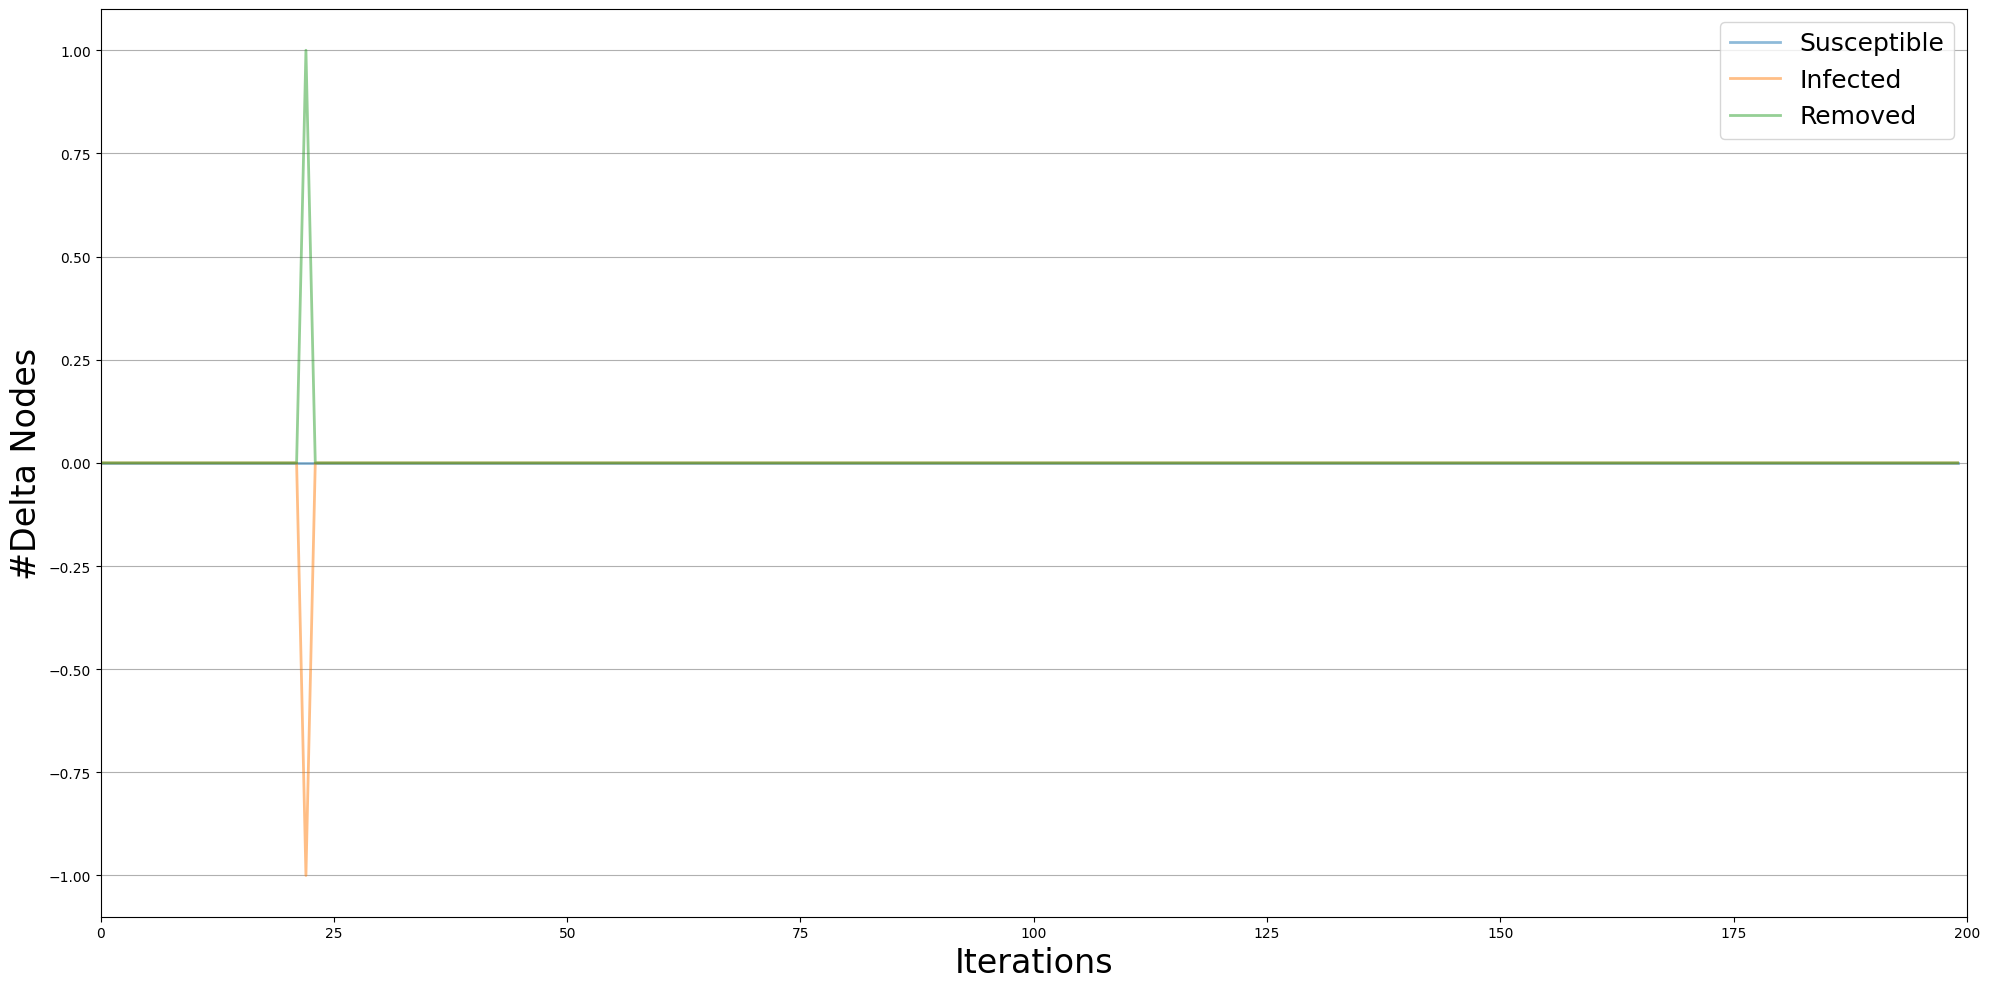

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_sir, trends)
viz.plot
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model_sir, trends)
viz.plot()

In [ ]:
# g = nx.erdos_renyi_graph(100, 0.4) #to use this graph to induce infection
model_thresM = ep.ThresholdModel(G3) # T_sub

# import json
print(json.dumps(model_thresM.parameters, indent=2))
# Model selection
model_thresM = ep.ThresholdModel(G3)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.2)

# Setting node parameters
threshold = 0.25
for i in G3.nodes():
    config.add_node_configuration("threshold", i, threshold)

model_thresM.set_initial_status(config)

# Simulation execution
iterations = model_thresM.iteration_bunch(200)
print(iterations)

trends = model_thresM.build_trends(iterations)
print(trends)


{
  "model": {},
  "nodes": {
    "threshold": {
      "descr": "Node threshold",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 0.1
    }
  },
  "edges": {}
}
[{'iteration': 0, 'status': {3: 0, 8: 0, 10: 0, 11: 0, 12: 1, 14: 1, 18: 0, 21: 1, 25: 1, 26: 0, 28: 0, 29: 0, 34: 1, 38: 0, 39: 0, 40: 0, 41: 0, 43: 0, 47: 0, 48: 0, 50: 0, 52: 0, 53: 0, 57: 0, 60: 0, 61: 0, 65: 0, 67: 0, 76: 0, 79: 0, 81: 0, 83: 0, 84: 0, 85: 0, 87: 1, 88: 0, 90: 0, 95: 1, 97: 1, 99: 0, 101: 0, 102: 0, 108: 1, 110: 0, 111: 0, 115: 0, 116: 0, 118: 1, 120: 1, 122: 1, 1: 1, 5: 0, 9: 0, 13: 0, 15: 0, 16: 0, 17: 1, 19: 0, 24: 0, 27: 0, 30: 0, 31: 0, 32: 0, 45: 0, 49: 0, 5384: 0, 7881: 0, 7358: 1, 36: 0, 35: 0, 1326: 0, 12035: 0, 20: 0, 5426: 0, 12037: 1, 37: 0, 5485: 0, 8830: 0, 15427: 0, 5424: 0, 5444: 0, 44: 0, 15429: 0}, 'node_count': {0: 67, 1: 16}, 'status_delta': {0: 0, 1: 0}}, {'iteration': 1, 'status': {18: 1, 28: 1, 38: 1, 39: 1, 41: 1, 5: 1, 9: 1, 13: 1, 15: 1, 16:

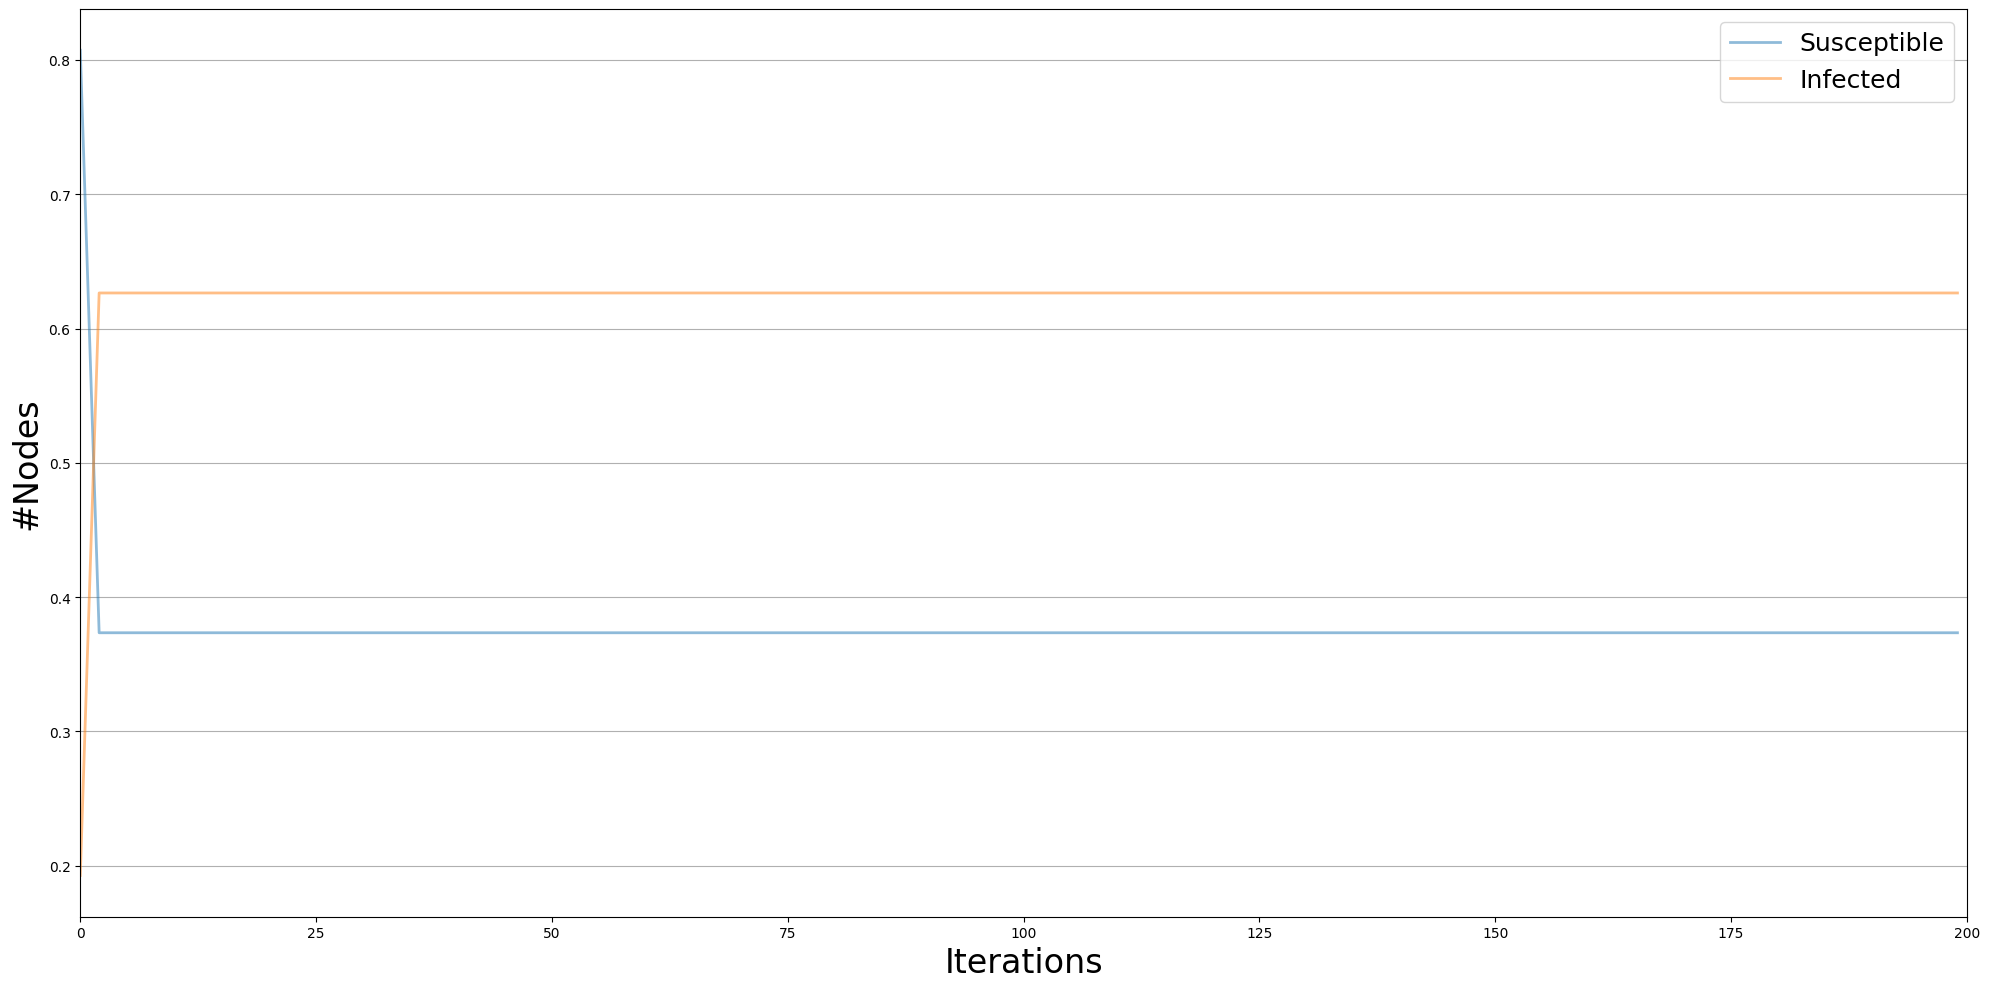

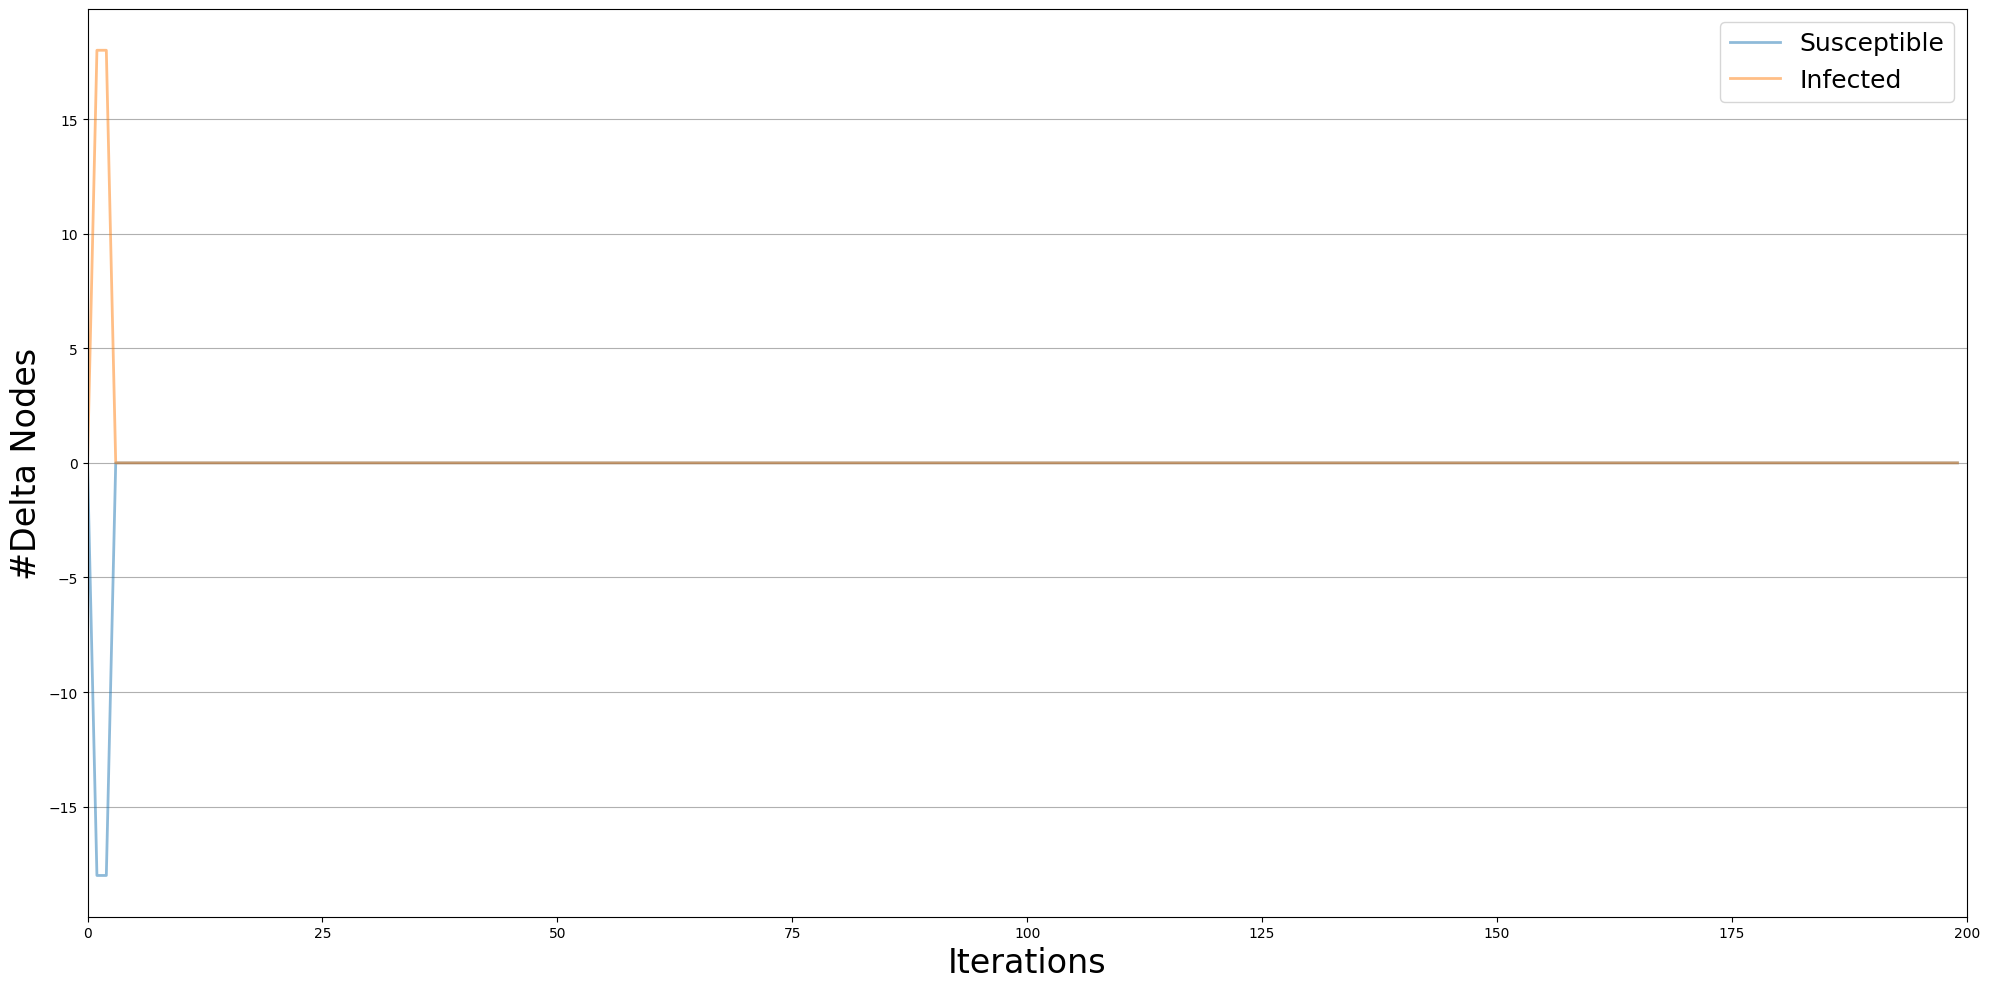

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_thresM, trends)
viz.plot()
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model_thresM, trends)
viz.plot()

In [ ]:
# Model selection
model_cascade = ep.IndependentCascadesModel(G3)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.2)

# Setting the edge parameters
threshold = 0.4
for e in G3.edges():
    config.add_edge_configuration("threshold", e, threshold)

model_cascade.set_initial_status(config)

# Simulation execution
iterations = model_cascade.iteration_bunch(200)
print(iterations)

trends = model_cascade.build_trends(iterations)
print(trends)

[{'iteration': 0, 'status': {3: 0, 8: 0, 10: 0, 11: 1, 12: 0, 14: 0, 18: 1, 21: 1, 25: 0, 26: 0, 28: 0, 29: 0, 34: 0, 38: 0, 39: 0, 40: 1, 41: 0, 43: 0, 47: 1, 48: 0, 50: 1, 52: 0, 53: 0, 57: 0, 60: 0, 61: 1, 65: 1, 67: 0, 76: 1, 79: 0, 81: 0, 83: 0, 84: 0, 85: 0, 87: 0, 88: 0, 90: 0, 95: 0, 97: 0, 99: 0, 101: 0, 102: 1, 108: 0, 110: 0, 111: 0, 115: 1, 116: 0, 118: 0, 120: 0, 122: 0, 1: 0, 5: 0, 9: 1, 13: 0, 15: 0, 16: 1, 17: 0, 19: 0, 24: 0, 27: 0, 30: 0, 31: 0, 32: 0, 45: 0, 49: 0, 5384: 0, 7881: 0, 7358: 0, 36: 1, 35: 0, 1326: 0, 12035: 0, 20: 0, 5426: 0, 12037: 1, 37: 0, 5485: 0, 8830: 0, 15427: 0, 5424: 0, 5444: 0, 44: 0, 15429: 1}, 'node_count': {0: 67, 1: 16, 2: 0}, 'status_delta': {0: 0, 1: 0, 2: 0}}, {'iteration': 1, 'status': {11: 2, 18: 2, 21: 2, 40: 2, 47: 2, 50: 2, 61: 2, 65: 2, 76: 2, 102: 2, 115: 2, 9: 2, 16: 2, 7881: 1, 36: 2, 35: 1, 12037: 2, 15429: 2}, 'node_count': {0: 65, 1: 2, 2: 16}, 'status_delta': {0: -2, 1: -14, 2: 16}}, {'iteration': 2, 'status': {7881: 2, 35:

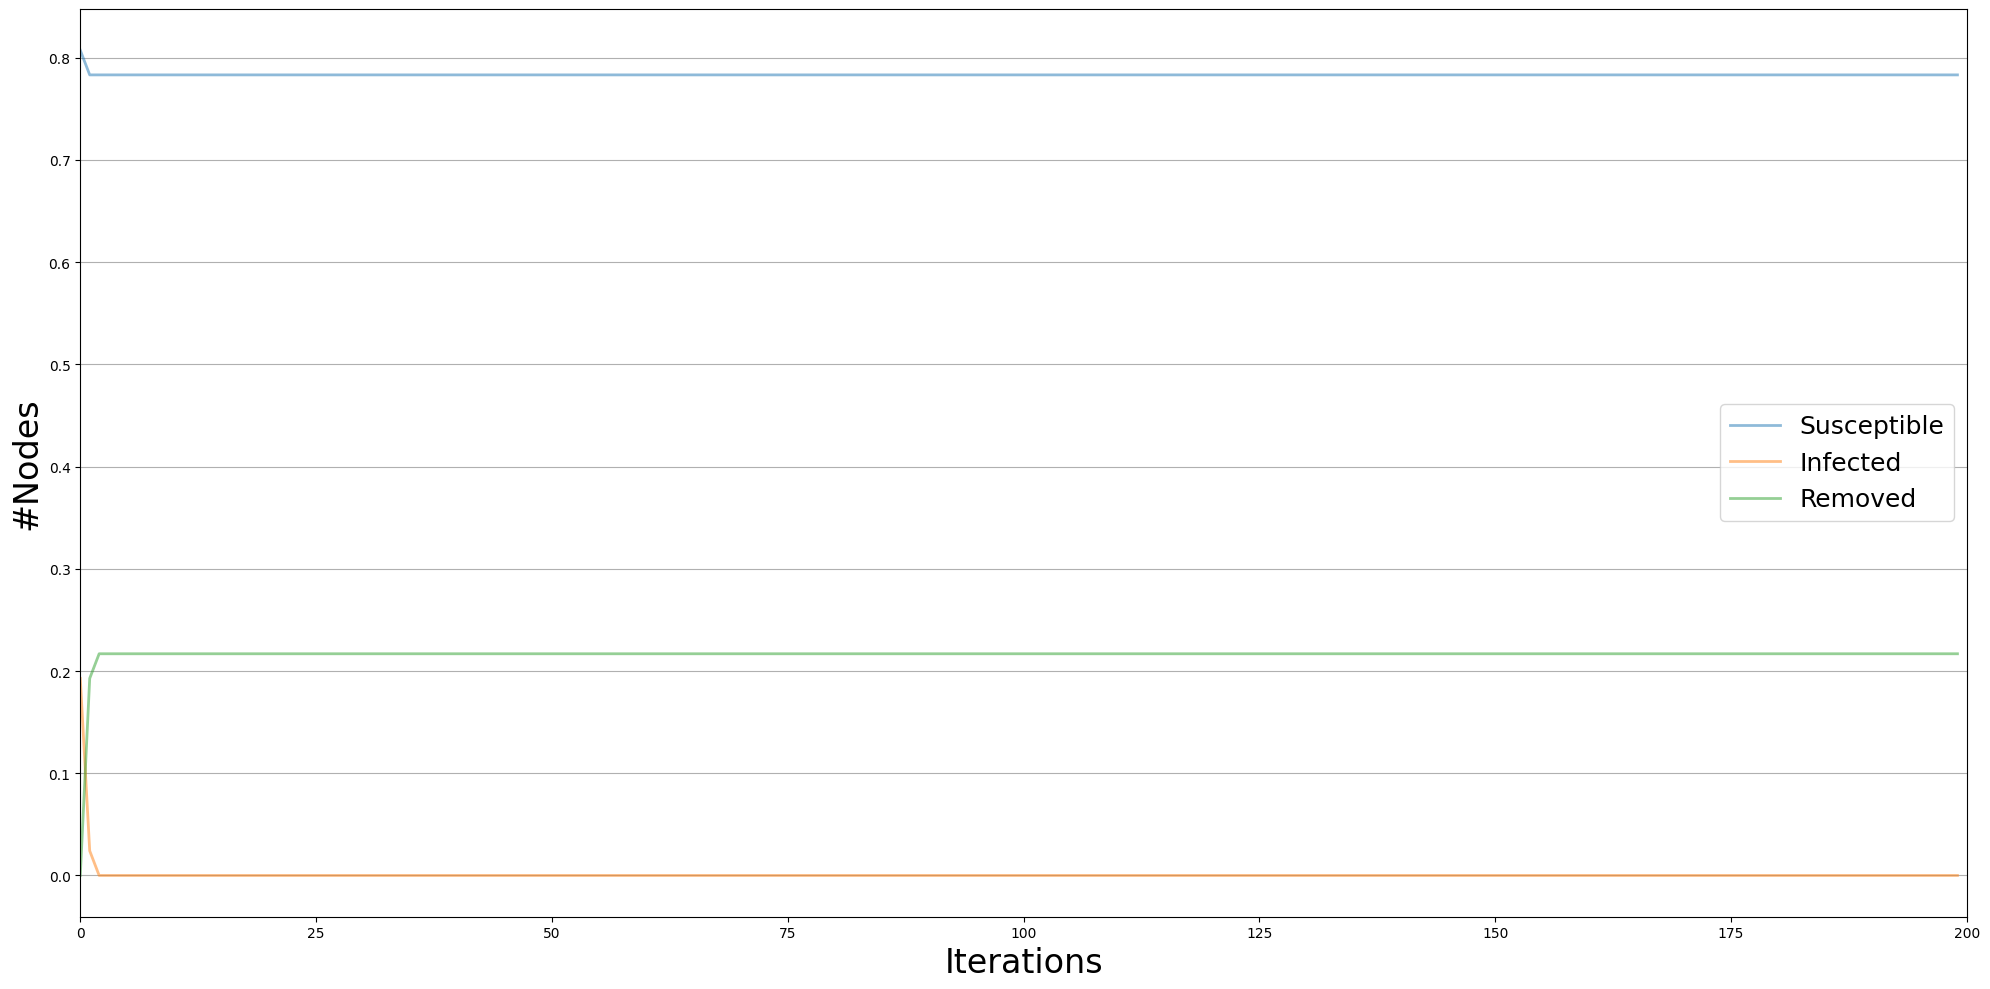

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_cascade, trends)
viz.plot()

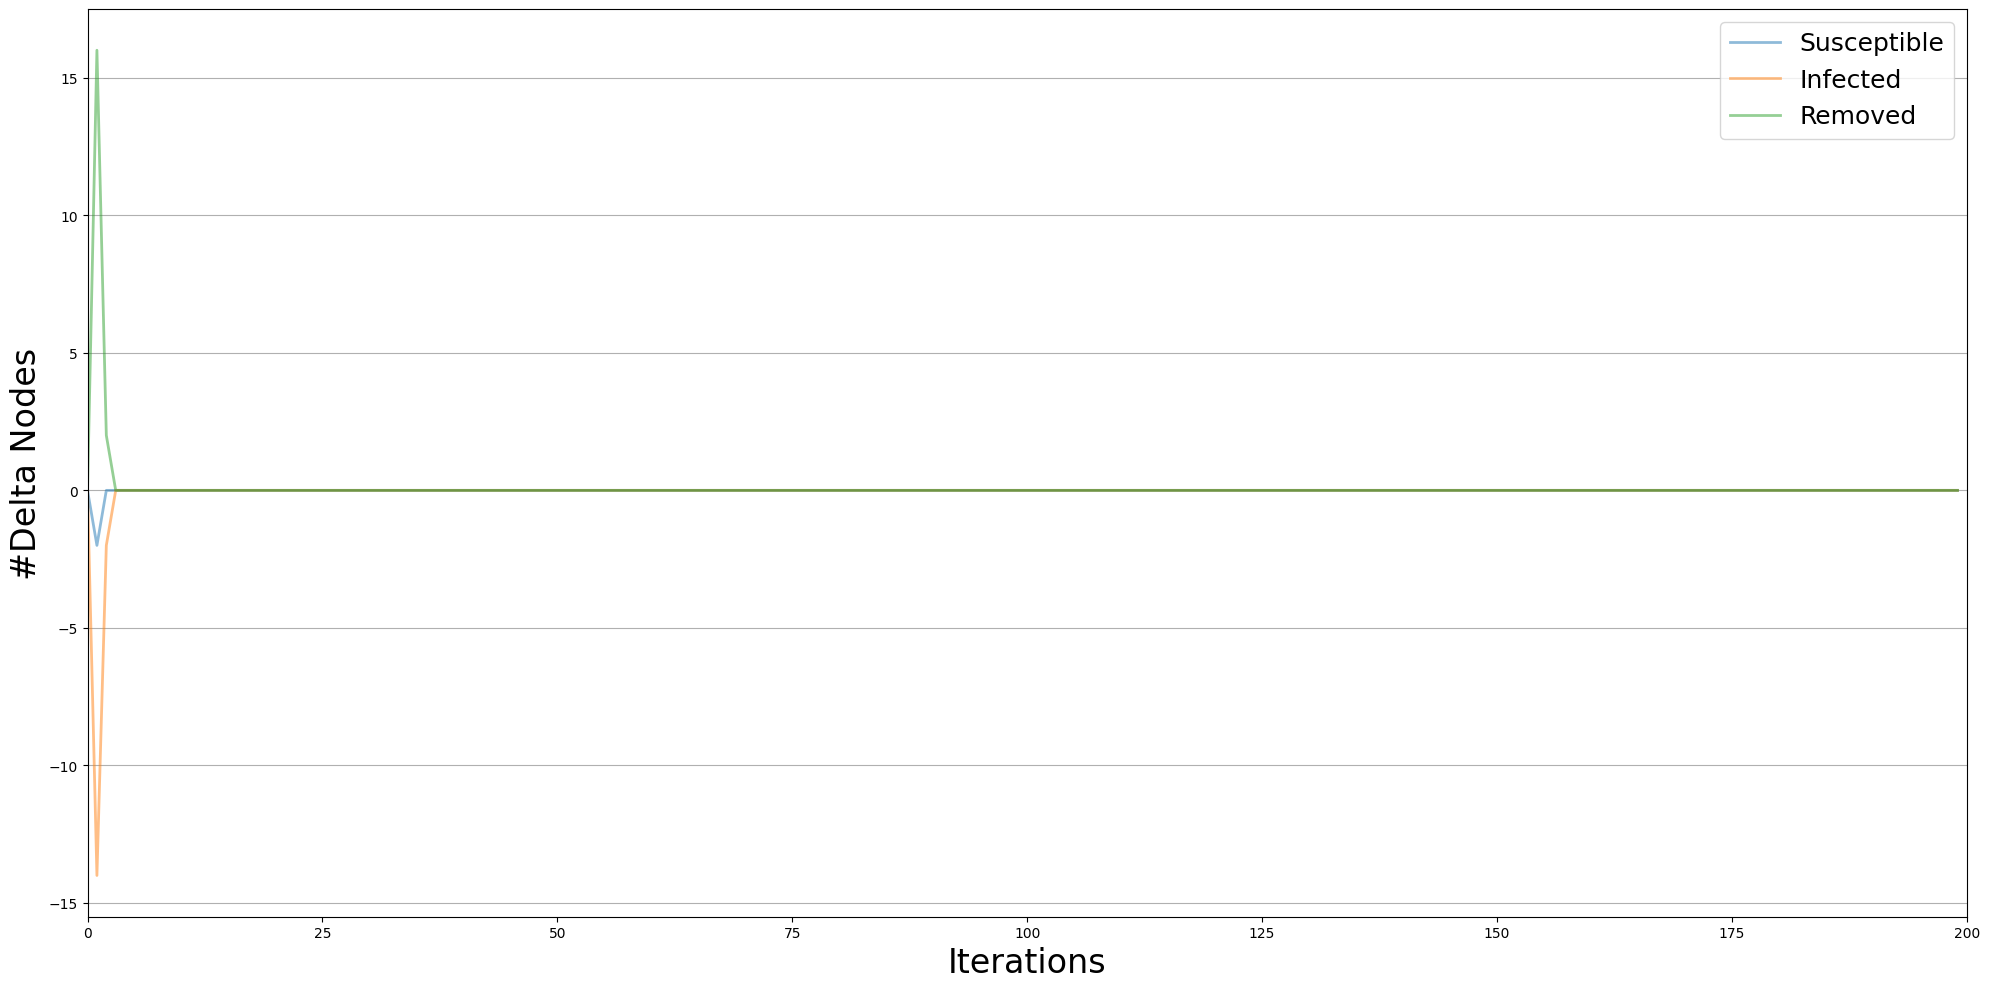

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model_cascade, trends)
viz.plot()

In [ ]:
# to create a spread from a given seed-node using the Independent Cascasde Model
def IC(g,S,p=0.5,mc=1000):
    """
    Input: graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """

    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):

        # Simulate propagation process
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:

                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(g.neighbors(node,mode="out"))) < p
                new_ones += list(np.extract(success, g.neighbors(node,mode="out")))

            new_active = list(set(new_ones) - set(A))

            # Add newly activated nodes to the set of activated nodes
            A += new_active

        spread.append(len(A))

    return(np.mean(spread))

In [ ]:
def greedy(g,k,p=0.1,mc=1000):
    """
    Input: graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()

    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        best_spread = 0
        for j in set(range(g.vcount()))-set(S):

            # Get the spread
            s = IC(g,S + [j],p,mc)

            # Update the winning node and spread so far
            if s > best_spread:
                best_spread, node = s, j

        # Add the selected node to the seed set
        S.append(node)

        # Add estimated spread and elapsed time
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)

In [ ]:
def celf(g,k,p=0.1,mc=1000):
    """
    Input: graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    # --------------------
    # Find the first node with greedy algorithm
    # --------------------

    # Calculate the first iteration sorted list
    start_time = time.time()
    marg_gain = [IC(g,[node],p,mc) for node in range(g.vcount())]

    # Create the sorted list of nodes and their marginal gain
    Q = sorted(zip(range(g.vcount()),marg_gain), key=lambda x: x[1],reverse=True)

    # Select the first node and remove from candidate list
    S, spread, SPREAD = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, LOOKUPS, timelapse = Q[1:], [g.vcount()], [time.time()-start_time]

    # --------------------
    # Find the next k-1 nodes using the list-sorting procedure
    # --------------------

    for _ in range(k-1):

        check, node_lookup = False, 0

        while not check:

            # Count the number of times the spread is computed
            node_lookup += 1

            # Recalculate spread of top node
            current = Q[0][0]

            # Evaluate the spread function and store the marginal gain in the list
            Q[0] = (current,IC(g,S+[current],p,mc) - spread)

            # Re-sort the list
            Q = sorted(Q, key = lambda x: x[1], reverse = True)

            # Check if previous top node stayed on top after the sort
            check = (Q[0][0] == current)

        # Select the next node
        spread += Q[0][1]
        S.append(Q[0][0])
        SPREAD.append(spread)
        LOOKUPS.append(node_lookup)
        timelapse.append(time.time() - start_time)

        # Remove the selected node from the list
        Q = Q[1:]

    return(S,SPREAD,timelapse,LOOKUPS)

In [ ]:
# model implementation
# computing diffusion model using simple user-defined data
from igraph import *

# Create simple network with 0 and 1 as the influential nodes
source = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,4,5]
target = [2,3,4,5,6,7,8,9,2,3,4,5,6,7,8,9,6,7,8,9]

g = Graph(directed = True)
g.add_vertices(range(10))
g.add_edges(zip(source,target))

In [ ]:
# run algorithms
celf_output = celf(g,2,p=0.2,mc=1000)
greedy_output = greedy(g,2,p=0.2,mc=1000)

# print results
print("celf output: " + str(celf_output[0]))
print("greedy output: " + str(greedy_output[0]))

celf output: [0, 1]
greedy output: [0, 1]


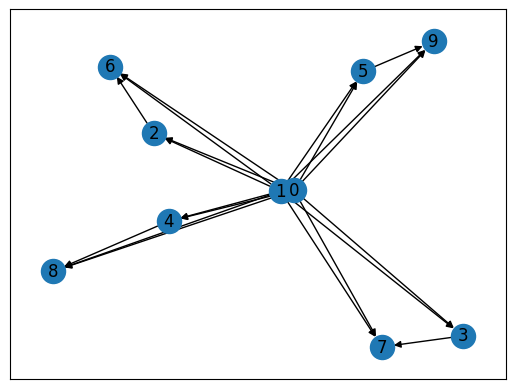

In [ ]:
# # to display the constructed graph
# # Create simple network with 0 and 1 as the influential nodes
# source = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,4,5]
# target = [2,3,4,5,6,7,8,9,2,3,4,5,6,7,8,9,6,7,8,9]

# g = nx.DiGraph(directed = True)
# g.add_nodes_from(range(10))
# g.add_edges_from(zip(source,target))

# # g.vs["label"], g.es["color"], g.vs["color"] = range(10), "#B3CDE3", "#FBB4AE"
# # plot(g,bbox = (200,200),margin = 20,layout = g.layout("kk"))
# nx.draw_networkx(g)

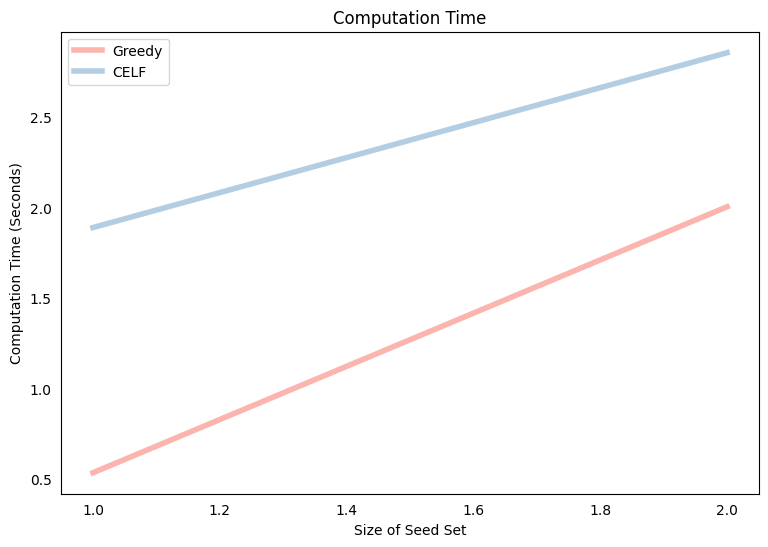

In [ ]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(greedy_output[2])+1),greedy_output[2],label="Greedy",color="#FBB4AE")
plt.plot(range(1,len(celf_output[2])+1),celf_output[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2);

[10, 6]


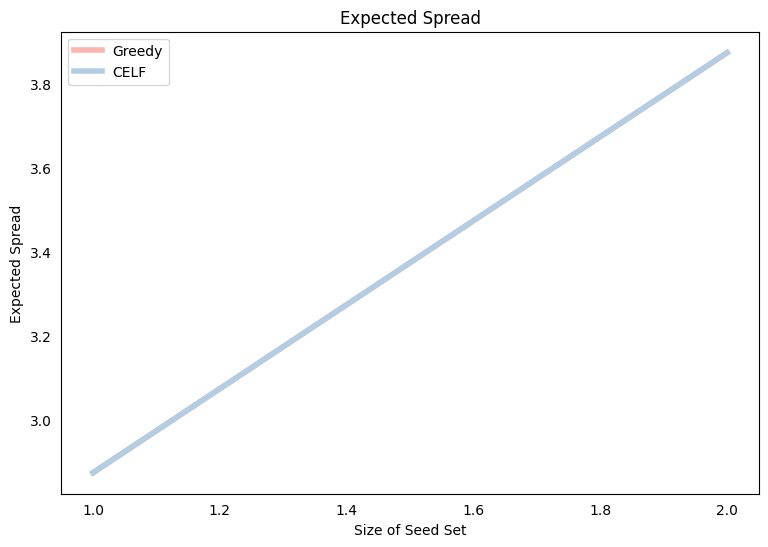

In [ ]:
print(celf_output[3])

# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(greedy_output[1])+1),greedy_output[1],label="Greedy",color="#FBB4AE")
plt.plot(range(1,len(celf_output[1])+1),celf_output[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2);
